<a href="https://colab.research.google.com/github/bhnjagtap/Text-Generator-NLP-Model/blob/main/text-generator%20NLP%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer


In [3]:
tokenizer = Tokenizer()

data = "In the sky, a golden sphere,\n"\
       "The sun emerges, bright and clear.\n"\
       "It paints the world with hues of gold,\n"\
       "A story of warmth and tales untold.\n"\
       "\n"\
       "It wakes the earth with gentle light,\n"\
       "Chasing shadows into flight.\n"\
       "A beacon of hope in morning's grace,\n"\
       "A symbol of life in every place.\n"\
       "\n"\
       "Through azure skies, it journeys high,\n"\
       "Casting its glow upon the sky.\n"\
       "A radiant ball of fiery hue,\n"\
       "Bathing the world in morning dew.\n"\
       "\n"\
       "Oh sun, celestial and grand,\n"\
       "Your presence felt across the land.\n"\
       "A source of light, a guiding star,\n"\
       "Forever cherished, near and far.\n"


corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_word = len(tokenizer.word_index)+ 1

print(total_word)

70


In [5]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line]) [0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
    print(input_sequences)


[[4, 1]]
[[4, 1], [4, 1, 7]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13], [1, 8]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13], [1, 8], [1, 8, 14]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13], [1, 8], [1, 8, 14], [1, 8, 14, 15]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13], [1, 8], [1, 8, 14], [1, 8, 14, 15], [1, 8, 14, 15, 5]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13], [1, 8], [1, 8, 14], [1, 8, 14, 15], [1, 8, 14, 15, 5], [1, 8, 14, 15, 5, 16]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13], [1, 8], [1, 8, 14], [1, 8, 14, 15], [1, 8, 14, 15, 5], [1, 8, 14, 15, 5, 16], [6, 17]]
[[4, 1], [4, 1, 7], [4, 1, 7, 2], [4, 1, 7, 2, 12], [4, 1, 7, 2, 12, 13], [1, 8], [

In [36]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences



max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_word)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
print(tokenizer.word_index['gentle'])
print(tokenizer.word_index['every'])
print(tokenizer.word_index['grand'])
print(tokenizer.word_index['morning'])
print(tokenizer.word_index['light'])
print(tokenizer.word_index['grand'])
print(tokenizer.word_index['earth'])

26
37
57
53
11
57
25


In [39]:
print(xs[6])
print(ys[6])
print(xs[5])
print(ys[5])


[0 0 0 0 0 1 8]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 1]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
print(tokenizer.word_index)

{'the': 1, 'a': 2, 'of': 3, 'in': 4, 'and': 5, 'it': 6, 'sky': 7, 'sun': 8, 'world': 9, 'with': 10, 'light': 11, 'golden': 12, 'sphere': 13, 'emerges': 14, 'bright': 15, 'clear': 16, 'paints': 17, 'hues': 18, 'gold': 19, 'story': 20, 'warmth': 21, 'tales': 22, 'untold': 23, 'wakes': 24, 'earth': 25, 'gentle': 26, 'chasing': 27, 'shadows': 28, 'into': 29, 'flight': 30, 'beacon': 31, 'hope': 32, "morning's": 33, 'grace': 34, 'symbol': 35, 'life': 36, 'every': 37, 'place': 38, 'through': 39, 'azure': 40, 'skies': 41, 'journeys': 42, 'high': 43, 'casting': 44, 'its': 45, 'glow': 46, 'upon': 47, 'radiant': 48, 'ball': 49, 'fiery': 50, 'hue': 51, 'bathing': 52, 'morning': 53, 'dew': 54, 'oh': 55, 'celestial': 56, 'grand': 57, 'your': 58, 'presence': 59, 'felt': 60, 'across': 61, 'land': 62, 'source': 63, 'guiding': 64, 'star': 65, 'forever': 66, 'cherished': 67, 'near': 68, 'far': 69}


In [43]:
model = Sequential()
model.add(Embedding(total_word, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_word, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
3/3 [==============================] - 4s 50ms/step - loss: 4.2489 - accuracy: 0.0241
Epoch 2/100
3/3 [==============================] - 0s 45ms/step - loss: 4.2290 - accuracy: 0.0843
Epoch 3/100
3/3 [==============================] - 0s 43ms/step - loss: 4.2078 - accuracy: 0.1205
Epoch 4/100
3/3 [==============================] - 0s 52ms/step - loss: 4.1855 - accuracy: 0.1205
Epoch 5/100
3/3 [==============================] - 0s 51ms/step - loss: 4.1463 - accuracy: 0.1084
Epoch 6/100
3/3 [==============================] - 0s 52ms/step - loss: 4.0913 - accuracy: 0.0843
Epoch 7/100
3/3 [==============================] - 0s 48ms/step - loss: 4.0075 - accuracy: 0.0843
Epoch 8/100
3/3 [==============================] - 0s 49ms/step - loss: 3.9362 - accuracy: 0.0843
Epoch 9/100
3/3 [==============================] - 0s 48ms/step - loss: 3.9429 - accuracy: 0.0964
Epoch 10/100
3/3 [==============================] - 0s 51ms/step - loss: 3.8914 - accuracy: 0.1446
Epoch 11/100
3/3 [=

In [44]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("earth")
  plt.ylabel(string)
  plt.show()

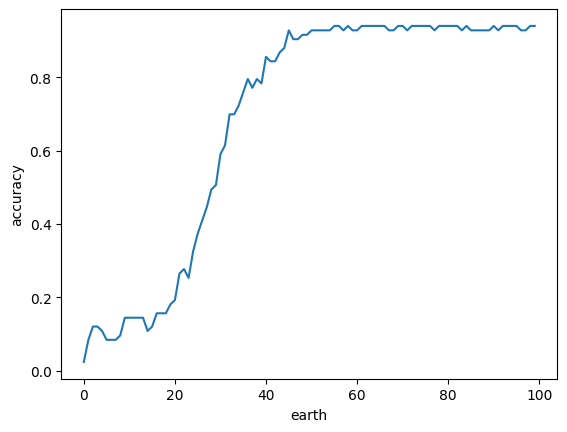

In [45]:
plot_graphs(history, 'accuracy')


In [46]:
seed_text = "oh sun celestial and grand"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 22ms/step
oh sun celestial and grand clear clear untold gold land land the dew gold in gold gold gold sky grace place gold sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place place sky grace place
